# To understand normal distribution and its application, Let us use daily returns of stocks traded in BSE (Bombay Stock Exchange). Imagine a scenario where an investor wants to understand the risks and returns associated with various stocks before investing in them.For this analysis, we will evaluate two stocks: BEML and GLAXO. The daily trading data (open and close price) for each stock is taken for the period starting from 2010 to 2016 from BSE site (www.bseindia.com)

# Import Libraries

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the datasets

In [53]:
beml = pd.read_csv('BEML.csv',parse_dates=['Date'],index_col='Date')
glaxo = pd.read_csv('GLAXO.csv',parse_dates=['Date'],index_col='Date')

In [54]:
# check the head of beml
beml.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-04-01,1121.0,1151.00,1121.00,1134.0,1135.60,101651,1157.18
2010-05-01,1146.8,1149.00,1128.75,1135.0,1134.60,59504,676.47
2010-06-01,1140.0,1164.25,1130.05,1137.0,1139.60,128908,1482.84
2010-07-01,1142.0,1159.40,1119.20,1141.0,1144.15,117871,1352.98
2010-08-01,1156.0,1172.00,1140.00,1141.2,1144.05,170063,1971.42


In [55]:
# check the head of glaxo
glaxo.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-04-01,1613.00,1629.10,1602.00,1629.0,1625.65,9365,151.74
2010-05-01,1639.95,1639.95,1611.05,1620.0,1616.80,38148,622.58
2010-06-01,1618.00,1644.00,1617.00,1639.0,1638.50,36519,595.09
2010-07-01,1645.00,1654.00,1636.00,1648.0,1648.70,12809,211.00
2010-08-01,1650.00,1650.00,1626.55,1640.0,1639.80,28035,459.11


In [56]:
beml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 2010-04-01 to 2016-12-30
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1739 non-null   float64
 1   High                  1739 non-null   float64
 2   Low                   1739 non-null   float64
 3   Last                  1739 non-null   float64
 4   Close                 1739 non-null   float64
 5   Total Trade Quantity  1739 non-null   int64  
 6   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 108.7 KB


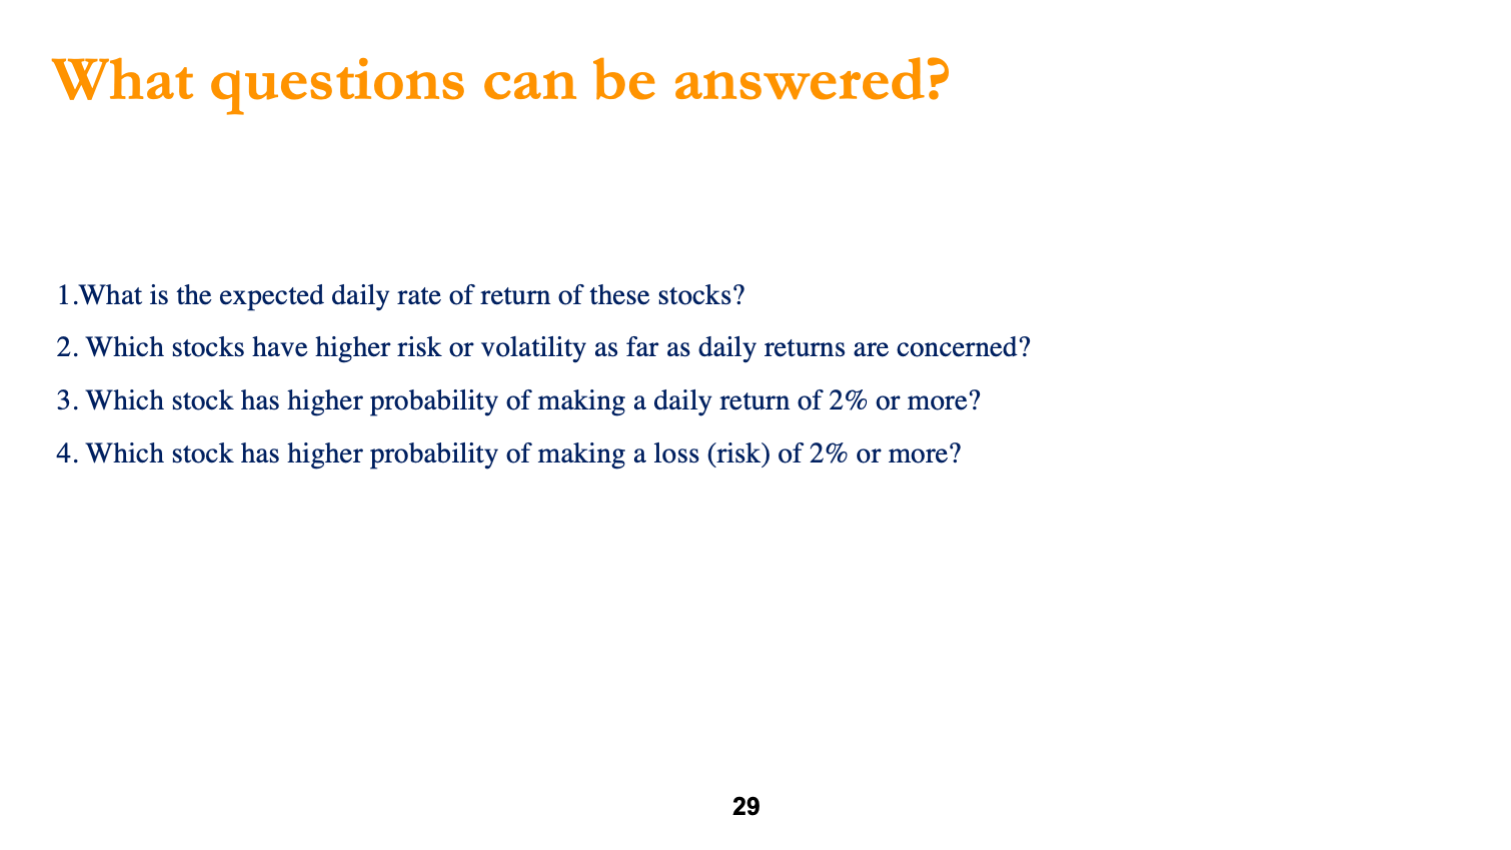

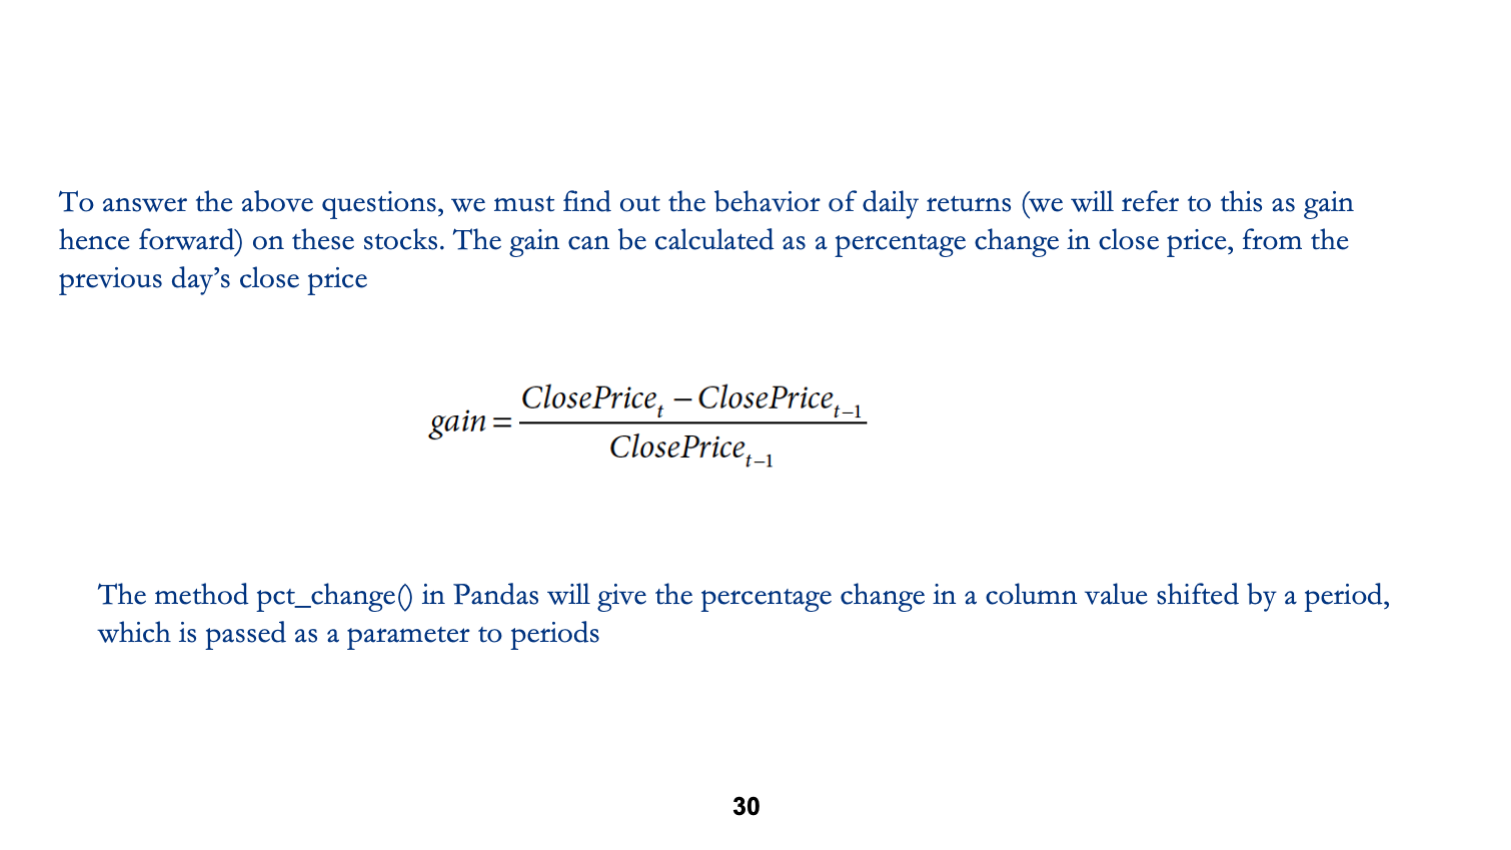

# Calculate Daily Gain

In [57]:
# saving daily percentage gain as a new column `gain` in the beml dataframe
beml['gain'] = beml['Close'].pct_change()
glaxo['gain'] = glaxo['Close'].pct_change()

In [58]:
beml.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),gain
Date,,,,,,,,
2010-04-01,1121.0,1151.00,1121.00,1134.0,1135.60,101651,1157.18,NaN
2010-05-01,1146.8,1149.00,1128.75,1135.0,1134.60,59504,676.47,-0.000881
2010-06-01,1140.0,1164.25,1130.05,1137.0,1139.60,128908,1482.84,0.004407
2010-07-01,1142.0,1159.40,1119.20,1141.0,1144.15,117871,1352.98,0.003993
2010-08-01,1156.0,1172.00,1140.00,1141.2,1144.05,170063,1971.42,-0.000087


In [59]:
glaxo.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),gain
Date,,,,,,,,
2010-04-01,1613.00,1629.10,1602.00,1629.0,1625.65,9365,151.74,NaN
2010-05-01,1639.95,1639.95,1611.05,1620.0,1616.80,38148,622.58,-0.005444
2010-06-01,1618.00,1644.00,1617.00,1639.0,1638.50,36519,595.09,0.013422
2010-07-01,1645.00,1654.00,1636.00,1648.0,1648.70,12809,211.00,0.006225
2010-08-01,1650.00,1650.00,1626.55,1640.0,1639.80,28035,459.11,-0.005398


In [60]:
# drop the na values as there is no difference for the first day
beml.dropna(inplace=True)
glaxo = glaxo.dropna()

In [61]:
glaxo.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
gain                    0
dtype: int64

# Visualize the Daily Gains

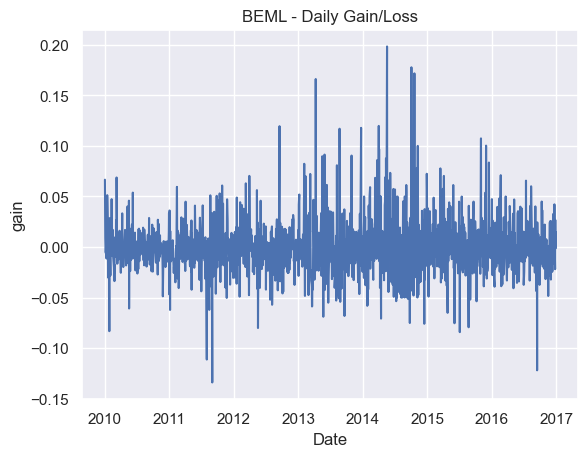

In [62]:
# visualize the gains on a daily basis - beml
sns.lineplot(data=beml, x=beml.index, y='gain')
plt.title('BEML - Daily Gain/Loss');

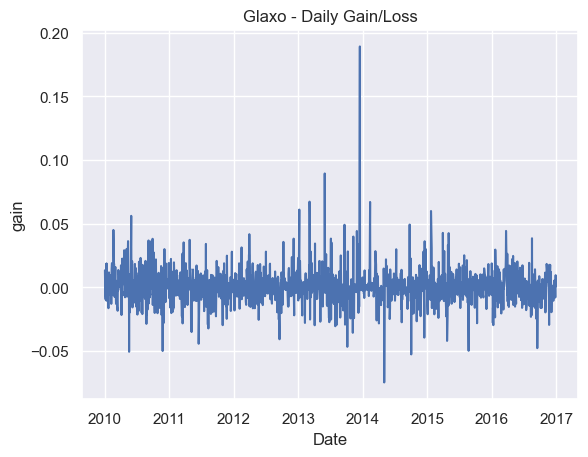

In [63]:
# visualize the gains on a daily basis - glaxo
sns.lineplot(data=glaxo, x=glaxo.index, y='gain')
plt.title('Glaxo - Daily Gain/Loss');

# Visualize the Daily Closing Price Trends

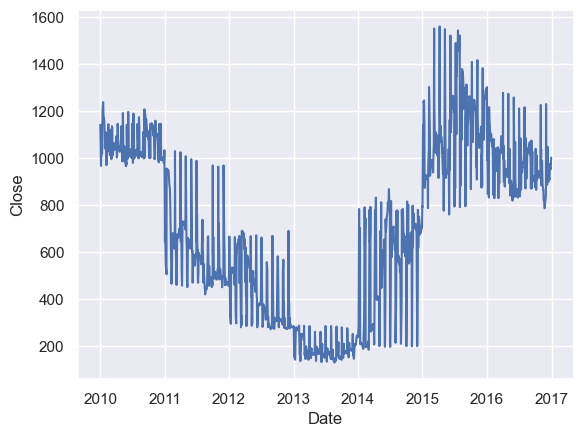

In [64]:
# trend of daily closing prices - beml
sns.lineplot(data=beml, x=beml.index, y='Close');

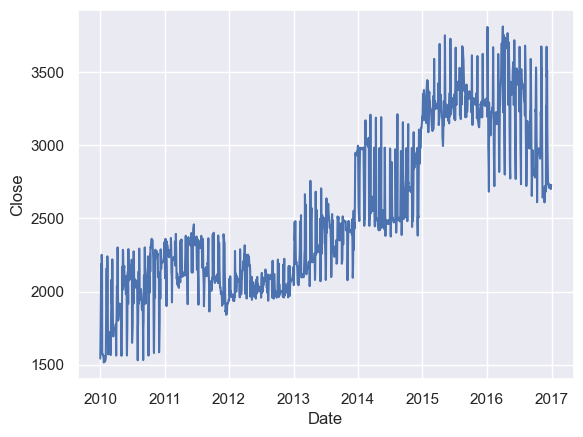

In [65]:
# trend of daily closing prices - glaxo
sns.lineplot(data=glaxo, x=glaxo.index, y='Close');

# Visualization of Distribution of Daily Gain Values

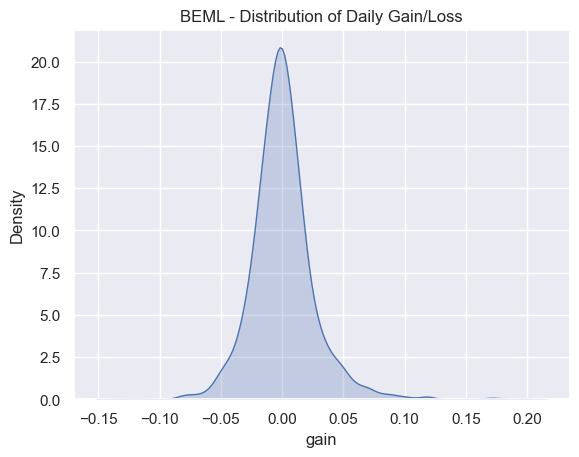

In [66]:
# distribution of beml gain values
sns.kdeplot(data=beml,x='gain',fill=True)
plt.title('BEML - Distribution of Daily Gain/Loss');

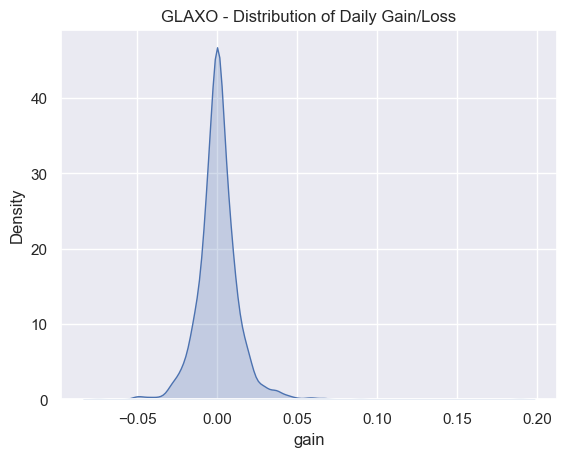

In [67]:
# distribution of glaxo gain values
sns.kdeplot(data=glaxo,x='gain',fill=True)
plt.title('GLAXO - Distribution of Daily Gain/Loss');

# Expected Gain ( Average or Mean Value of Daily Gain)

In [68]:
beml_mean = beml['gain'].mean()

In [69]:
glaxo_mean = glaxo['gain'].mean()

# Volatility in Daily Gain (Standard Deviation or Variance)

In [70]:
beml_sd = beml['gain'].std()
beml_sd

0.026430831468474872

In [71]:
glaxo_sd = glaxo['gain'].std()
glaxo_sd

0.013360538552253337

# Probability of making a loss of 2% or more in Glaxo

In [72]:
# import scipy.stats
from scipy.stats import norm

In [73]:
# glaxo
norm.cdf(-0.02,loc=glaxo_mean, scale=glaxo_sd)

0.063524886671774

In [74]:
# beml
norm.cdf(-0.02, loc=beml_mean, scale=beml_sd)

0.22155987503755292

# Probability of making a gain of 2% or more in Glaxo

In [75]:
# glaxo
1 - norm.cdf(0.02, glaxo_mean, glaxo_sd)

0.07104511457618568

In [76]:
# beml
1 - norm.cdf(0.02, beml_mean,beml_sd)

0.22769829484075355

# Inclass Exercise

## Probability of making a loss of 1% or more in BEML

In [77]:
norm.cdf(-0.01, beml_mean,beml_sd)

0.34878985475250623

## Probability of making a loss of 3% or more in BEML

In [78]:
norm.cdf(-0.03, beml_mean,beml_sd)

0.1260462382691962